# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
total_mice = merged_data["Mouse ID"].nunique()
total_mice

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_data

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = merged_data[merged_data["Mouse ID"] == "g989"]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"] != "g989"].drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
clean_total = clean_data["Mouse ID"].nunique()
clean_total

248

## Summary Statistics

In [25]:
#grouped_data = clean_data.groupby(["Drug Regimen"]).count()

t_v_mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
t_v_median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
t_v_variance = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
t_v_std_Dev = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
t_v_std_err = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

#grouped_data
summary_df = pd.DataFrame()
summary_df["Mean Tumor Volume"] = t_v_mean
summary_df["Median Tumor Volume"] = t_v_median
summary_df["Tumor Volume Variance"] = t_v_variance
summary_df["Tumor Volume Std. Dev."] = t_v_std_Dev
summary_df["Tumor Volume Std. Err."] = t_v_std_err

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
summary_agg = clean_data.groupby(["Drug Regimen"],as_index=True)["Tumor Volume (mm3)"].agg({"mean", "median", "var", "std", "sem"})
summary_agg
#YOOOOOOOO!!! Thats so much easier

,sem,mean,median,std,var
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,4.994774,24.947764
Ceftamin,0.469821,52.591172,51.776157,6.268188,39.290177
Infubinol,0.492236,52.884795,51.820584,6.567243,43.128684
Ketapril,0.603860,55.235638,53.698743,8.279709,68.553577
Naftisol,0.596466,54.331565,52.509285,8.134708,66.173479
Placebo,0.581331,54.033581,52.288934,7.821003,61.168083
Propriva,0.544332,52.320930,50.446266,6.622085,43.852013
Ramicane,0.320955,40.216745,40.673236,4.846308,23.486704
Stelasyn,0.573111,54.233149,52.431737,7.710419,59.450562


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_data.groupby(["Drug Regimen"],as_index=True)["Tumor Volume (mm3)"].agg({"mean", "median", "var", "std", "sem"})
summary_agg

,sem,mean,median,std,var
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,4.994774,24.947764
Ceftamin,0.469821,52.591172,51.776157,6.268188,39.290177
Infubinol,0.492236,52.884795,51.820584,6.567243,43.128684
Ketapril,0.603860,55.235638,53.698743,8.279709,68.553577
Naftisol,0.596466,54.331565,52.509285,8.134708,66.173479
Placebo,0.581331,54.033581,52.288934,7.821003,61.168083
Propriva,0.544332,52.320930,50.446266,6.622085,43.852013
Ramicane,0.320955,40.216745,40.673236,4.846308,23.486704
Stelasyn,0.573111,54.233149,52.431737,7.710419,59.450562


## Bar and Pie Charts

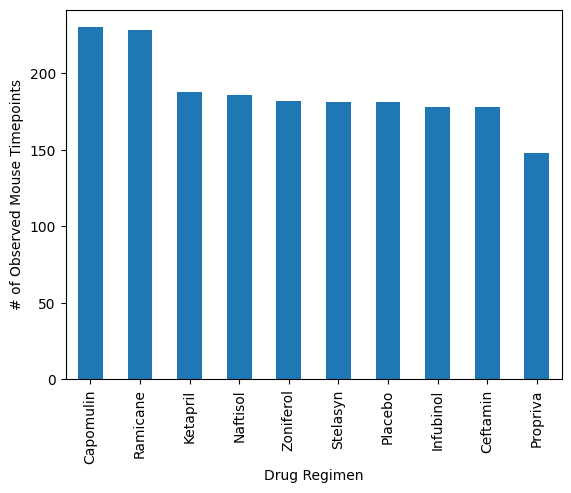

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data = clean_data["Drug Regimen"].value_counts()
figure_1 = mouse_data.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")
plt.show()

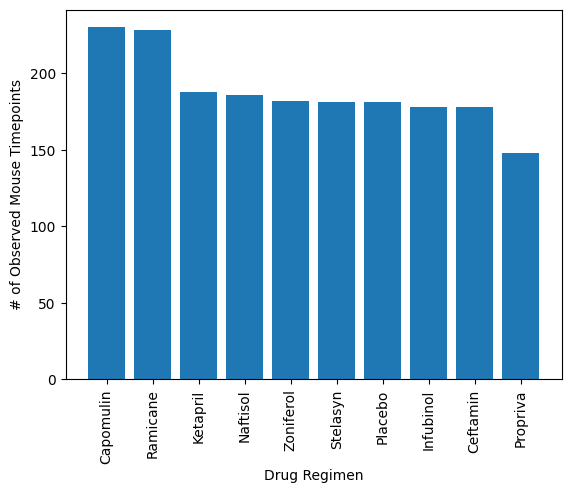

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_data))
tick_locations = [value for value in x_axis]

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, mouse_data, alpha=1, align="center")
plt.xticks(tick_locations, mouse_data.index, rotation="vertical")

plt.show()

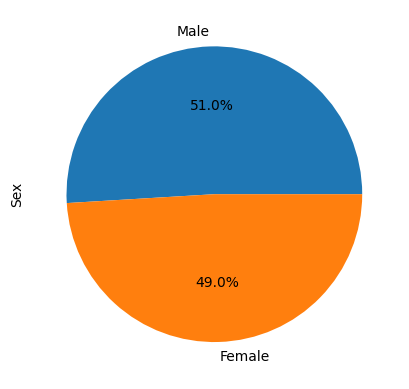

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data = clean_data["Sex"].value_counts()
figure_2 = mouse_data.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")
plt.show()

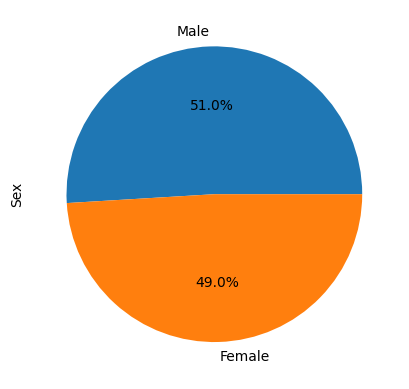

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

mouse_pie = plt.pie(clean_data["Sex"].value_counts(), labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
Ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane"]
Infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol"]
Ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
cap_data_last = pd.DataFrame(Capomulin_data.groupby("Mouse ID").max()["Timepoint"])
ram_data_last = pd.DataFrame(Ramicane_data.groupby("Mouse ID").max()["Timepoint"])
inf_data_last = pd.DataFrame(Infubinol_data.groupby("Mouse ID").max()["Timepoint"])
cef_data_last = pd.DataFrame(Ceftamin_data.groupby("Mouse ID").max()["Timepoint"])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_drug_merge = pd.merge(cap_data_last, clean_data, on=("Mouse ID","Timepoint"),how="left")
ram_drug_merge = pd.merge(ram_data_last, clean_data, on=("Mouse ID","Timepoint"),how="left")
inf_drug_merge = pd.merge(inf_data_last, clean_data, on=("Mouse ID","Timepoint"),how="left")
cef_drug_merge = pd.merge(cef_data_last, clean_data, on=("Mouse ID","Timepoint"),how="left")

merge_1 = pd.merge(cap_drug_merge, ram_drug_merge, how="outer")
merge_2 = pd.merge(inf_drug_merge, cef_drug_merge, how="outer")

all_drug_merge = pd.concat([cap_drug_merge, ram_drug_merge, inf_drug_merge, cef_drug_merge], ignore_index=True)
#all_drug_merge = pd.merge(merge_1, merge_2, how="outer")
all_drug_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
plot_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = all_drug_merge.loc[all_drug_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    plot_list.append(drug_data)
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
   
    print(f"{drug}'s potential outliers: {outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


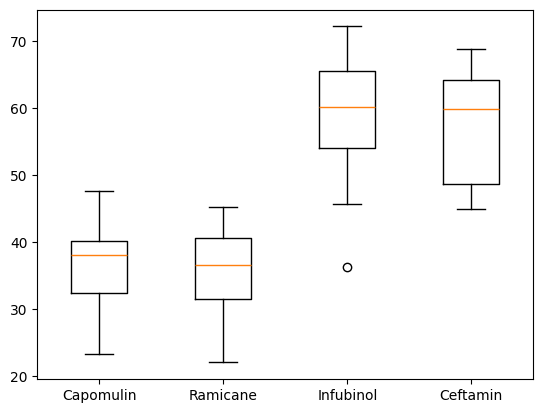

In [42]:
#fig1, ax1 = plt.subplots()

# ax1.set_ylabel('Final Tumor Volume (mm3)')
# ax1.boxplot(plot_list)
plt.boxplot(plot_list, labels=drug_list)
plt.show()


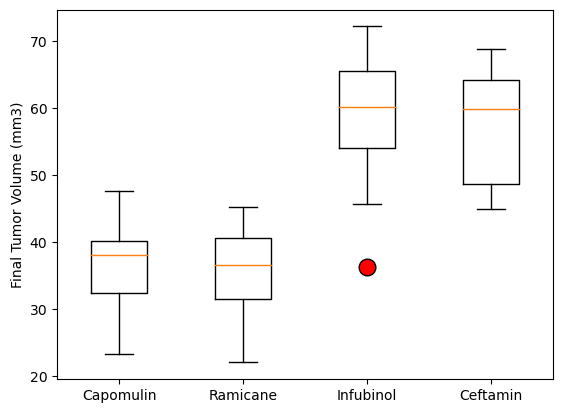

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(plot_list, labels=drug_list)
plt.show()

## Line and Scatter Plots

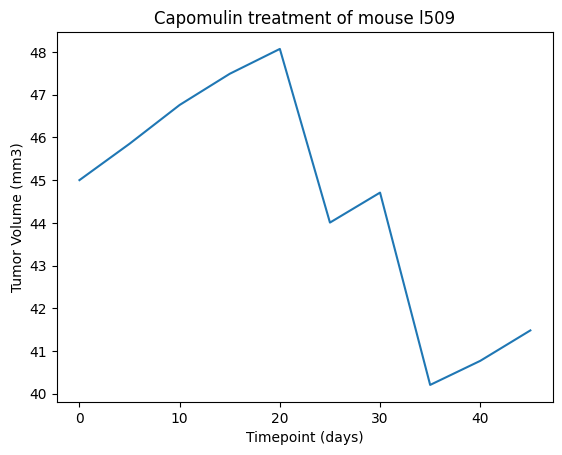

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_df = clean_data.loc[clean_data["Mouse ID"] == "l509"]
plt.plot(single_mouse_df["Timepoint"], single_mouse_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [51]:
Capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


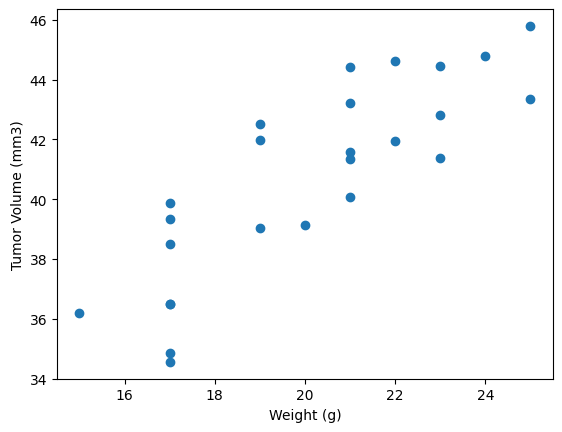

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_avg = Capomulin_data[["Tumor Volume (mm3)", "Weight (g)"]].groupby(Capomulin_data["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


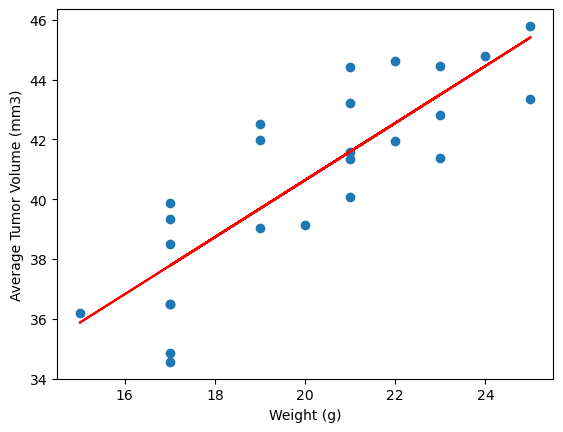

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = cap_avg["Weight (g)"]
y_values = cap_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()